# Testing Ground for rhino-daq

In [6]:
import numpy as np
import h5py
import yaml
import matplotlib.pyplot as plt


# Generate Mock Data to Test process_cache.py

In [3]:
# Base of actual obs_config.yaml
with open('obs_config.yaml','r') as f:
        obs_config = yaml.safe_load(f)
print(obs_config)


{'observationParams': {'runLength': 30, 'obsCachePath': 'obs_cache', 'dataDirectory': 'data', 'optimisedObserving': False, 'switchInstructions': None, 'customName': None}, 'sdr': {'active': True, 'centreFrequency': 70000000.0, 'bandwidth': 8000000.0, 'nChannels': 4096, 'sdrDriver': 'sdrplay', 'sdrLabel': 'SDRplay Dev0 RSPdx 2302031848', 'sdrId': 2302031848, 'sampleIntegrationTime': 1, 'spectrometerMode': 'pfb', 'sdrGain': 36, 'pfbParams': {'nTaps': 4, 'appliedWindow': 'blackman'}, 'fftParams': {'appliedWindow': 'blackman_harris'}}, 'auxSdr': {'active': True, 'centreFrequency': 70000000.0, 'bandwidth': 8000000.0, 'nChannels': 4096, 'sdrDriver': 'sdrplay', 'sdrLabel': 'SDRplay Dev1 RSP1A 2238063199', 'sdrId': 2238063199, 'sampleIntegrationTime': 1, 'spectrometerMode': 'fft', 'pfbParams': {'nTaps': 4, 'appliedWindow': 'sinc_blackman'}, 'fftParams': {'appliedWindow': 'blackman_harris'}}, 'arduino': {'active': False, 'comPort': 'com_port_string', 'temperatureMonitoring': {'active': False, '

In [5]:
obs_cache_path = obs_config['observationParams']['obsCachePath']

data_update = True
np.save(f'{obs_cache_path}/new_data_bool.npy', data_update)
np.save(f'{obs_cache_path}/mock_data_bool.npy', False)


In [ ]:

if obs_config['sdr']['active']:
    # generate mock_spectra
    n_freqs = obs_config['sdr']['nChannels']
    run_length = obs_config['observationParams']['runLength']
    sample_time = obs_config['sdr']['sampleIntegrationTime']
    n_times = int(run_length / sample_time)
    sdr_centre_freq = obs_config['sdr']['centreFrequency']
    sdr_bandwidth = obs_config['sdr']['bandwidth']
    print(type(sdr_centre_freq), type(sdr_bandwidth))
    # mock_array
    sdr_waterfall = np.ones(shape=(n_times, n_freqs))
    sdr_freqs = np.linspace(start=sdr_centre_freq - (sdr_bandwidth/2),
                            stop=sdr_centre_freq + (sdr_bandwidth/2),
                            num=n_freqs)
    sdr_times = np.linspace(start=0, stop=run_length, num=n_times)

    np.save(f'{obs_cache_path}/sdr_waterfall.npy', sdr_waterfall)
    np.save(f'{obs_cache_path}/sdr_times.npy', sdr_times)
    np.save(f'{obs_cache_path}/sdr_freqs.npy', sdr_freqs)

if obs_config['auxSdr']['active']:
    # generate mock_spectra
    n_freqs = obs_config['auxSdr']['nChannels']
    run_length = obs_config['observationParams']['runLength']
    sample_time = obs_config['auxSdr']['sampleIntegrationTime']
    n_times = int(run_length / sample_time)
    sdr_centre_freq = obs_config['auxSdr']['centreFrequency']
    sdr_bandwidth = obs_config['auxSdr']['bandwidth']
    print(type(sdr_centre_freq), type(sdr_bandwidth))
    # mock_array
    aux_sdr_waterfall = np.ones(shape=(n_times, n_freqs))
    aux_sdr_freqs = np.linspace(start=sdr_centre_freq - (sdr_bandwidth/2),
                            stop=sdr_centre_freq + (sdr_bandwidth/2),
                            num=n_freqs)
    aux_sdr_times = np.linspace(start=0, stop=run_length, num=n_times)

    np.save(f'{obs_cache_path}/aux_sdr_waterfall.npy', aux_sdr_waterfall)
    np.save(f'{obs_cache_path}/aux_sdr_times.npy', aux_sdr_times)
    np.save(f'{obs_cache_path}/aux_sdr_freqs.npy', aux_sdr_freqs)

if obs_config['arduino']['active']:
    if obs_config['arduino']['temperatureMonitoring']['active']:
        nProbes = obs_config['arduino']['temperatureMonitoring']['nProbes']
        obsRate = obs_config['arduino']['temperatureMonitoring']['obsRate']
        n_samples = int(run_length * obsRate)
        temp_times = np.linspace(start=0, stop=run_length, num=n_samples)
        mock_temps = np.ones(shape=(n_samples, nProbes))

        np.save(f'{obs_cache_path}/arduino_temps_values.npy', mock_temps)
        np.save(f'{obs_cache_path}/arduino_temps_times.npy', temp_times)
    
print(obs_config['observationParams']['customName'])


In [14]:
with h5py.File('data/data/2025-10-13_15-16-11_obs.hd5f', mode='r') as f:
    sdr_group = list(f['sdr'].keys())
    sdr_waterfall = f['aux_sdr']['aux_sdr_waterfall'][()]
    print(sdr_group)



['sdr_freqs', 'sdr_times', 'sdr_waterfall']


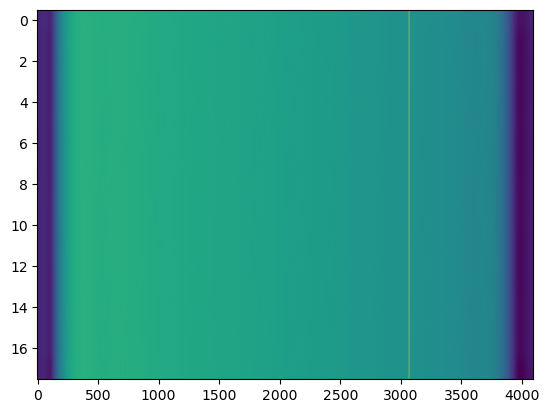

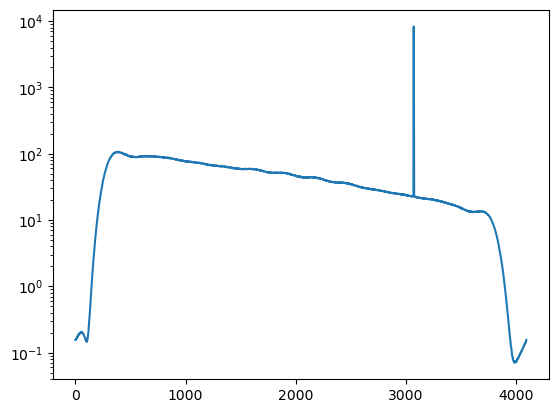

In [17]:
plt.imshow(10*np.log10(sdr_waterfall), aspect='auto')
plt.show()

mean = np.mean(sdr_waterfall, axis=0)

plt.plot(mean)
plt.yscale('log')